### Grupowanie

[pandas GroupBy: Your Guide to Grouping Data in Python](https://realpython.com/pandas-groupby/)

https://github.com/unitedstates/congress-legislators - Zbiór danych Kongresu USA zawiera publiczne informacje o historycznych członkach Kongresu.

Wczytajmy dane

In [17]:
# pandas_legislators.py
import pandas as pd

cols = ["first_name", "last_name", 'type', 'state', 'party', 'gender', 'birthday']

df = pd.read_csv(
    'data/legislators-historical.csv', 
    usecols=cols,
    parse_dates=['birthday'],
    dtype={
        "state": "category",
        "type": "category",
        "party": "category",
        "gender": "category",
        "first_name": "category"
    }
)
df

,last_name,first_name,birthday,gender,type,state,party
0,Bassett,Richard,1745-04-02,M,sen,DE,Anti-Administration
1,Bland,Theodorick,1742-03-21,M,rep,VA,NaN
2,Burke,Aedanus,1743-06-16,M,rep,SC,NaN
3,Carroll,Daniel,1730-07-22,M,rep,MD,NaN
4,Clymer,George,1739-03-16,M,rep,PA,NaN
...,...,...,...,...,...,...,...
11970,Garrett,Thomas,1972-03-27,M,rep,VA,Republican
11971,Handel,Karen,1962-04-18,F,rep,GA,Republican
11972,Jones,Brenda,1959-10-24,F,rep,MI,Democrat
11973,Marino,Tom,1952-08-15,M,rep,PA,Republican


Timestamp('1742-03-21 00:00:00')

In [ ]:
...

In [ ]:
...

Spróbujmy teraz podziałać z grupowaniem.

Ilu jest w zbiorze kongresmenów w poszczególnych stanach. Tego typu zapytanie w języku sql mogłoby mieć postać: <pre><code>SELECT state, count(name)
FROM df
GROUP BY state
ORDER BY state;
</code></pre>

A jak to będzie wyglądało w pandas?

Klauzula `groupby` stworzy worki, po jednym worku na każdy stan.

In [21]:
df_groupby = df.groupby("state", observed=False)

Na workach możemy wykonywać jakieś statystyki (tzw. funkcje agregujące), np. możemy zliczyć ile jest niepustych wpisów w każdym z worków za pomocą funkcji `count`.

In [22]:
print(dir(df_groupby))

['_DataFrameGroupBy__examples_dataframe_doc', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_agg_examples_doc', '_agg_general', '_agg_py_fallback', '_aggregate_frame', '_aggregate_with_numba', '_apply_filter', '_apply_to_column_groupbys', '_ascending_count', '_choose_path', '_concat_objects', '_constructor', '_cumcount_array', '_cython_agg_general', '_cython_transform', '_define_paths', '_deprecate_axis', '_descending_count', '_dir_additions', '_dir_deletions', '_fill', '_get_data_to_aggregate', '_get_index', '_get_indices', '_gotitem',

albo ile jest niepustych wpisów dla wybranej kolumny (gdybyśmy chcieli uwzględnić również wpisy z pustymi wartościami należałoby zamiast metody `count` użyć metody `size`).

In [27]:
df_groupby.count()

,last_name,first_name,birthday,gender,type,party
state,,,,,,
AK,16,16,16,16,16,14
AL,206,206,197,206,206,206
AR,117,117,114,117,117,115
AS,2,2,2,2,2,2
AZ,48,48,48,48,48,48
CA,361,361,358,361,361,361
CO,90,90,90,90,90,90
CT,240,240,238,240,240,227
DC,2,2,2,2,2,2


10 pierwszych wpisów

In [29]:
df_groupby["last_name"].count().head(n=10)

state
AK     16
AL    206
AR    117
AS      2
AZ     48
CA    361
CO     90
CT    240
DC      2
DE     97
Name: last_name, dtype: int64

Możemy grupować po kilku kolumnach. Każdy kolejny poziom grupowania oznacza stworzenie worków wewnątrz innych worków. Możemy na przykład wewnątrz naszych worków dla poszczególnych stanów potworzyć worki na płeć. I na takich "podworkach" wyliczyć jakieś statystyki.

Ile było kobiet i mężczyzn kongresmenów w poszczególnych stanach.

Zapytanie sql miałoby postać: <pre><code>SELECT state, gender, count(name)
FROM df
GROUP BY state, gender
ORDER BY state, gender;</code></pre>

Zapytanie pandas:

In [31]:
res = df.groupby(["state", "gender"]).count()
res

C:\Users\j.grynczewski\AppData\Local\Temp\ipykernel_58568\1353004034.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby(["state", "gender"]).count()


last_name  first_name  birthday  type  party
state gender                                              
AK    F               0           0         0     0      0
      M              16          16        16    16     14
AL    F               3           3         3     3      3
      M             203         203       194   203    203
AR    F               5           5         5     5      5
...                 ...         ...       ...   ...    ...
WI    M             196         196       196   196    196
WV    F               1           1         1     1      1
      M             119         119       117   119    119
WY    F               2           2         2     2      2
      M              38          38        38    38     38

[116 rows x 5 columns]

In [32]:
res.index

MultiIndex([('AK', 'F'),
            ('AK', 'M'),
            ('AL', 'F'),
            ('AL', 'M'),
            ('AR', 'F'),
            ('AR', 'M'),
            ('AS', 'F'),
            ('AS', 'M'),
            ('AZ', 'F'),
            ('AZ', 'M'),
            ...
            ('VT', 'F'),
            ('VT', 'M'),
            ('WA', 'F'),
            ('WA', 'M'),
            ('WI', 'F'),
            ('WI', 'M'),
            ('WV', 'F'),
            ('WV', 'M'),
            ('WY', 'F'),
            ('WY', 'M')],
           names=['state', 'gender'], length=116)

In [34]:
res.loc[('AL', 'M')]

last_name     203
first_name    203
birthday      194
type          203
party         203
Name: (AL, M), dtype: int64

Metoda `groupby` biblioteki pandas i klauzula `GROUP BY` języka sql są podobne, ale nie identyczne. Jedną z ważniejszych różnic pomiędzy nimi jest postać zwracanego wyniku. Podczas gdy klauzula `GROUP BY` zwraca result set, metoda `groupby` zwraca serię (w przypadku więcej niż jeden poziom worków metoda zwraca serię z wielokrotnym indeksem).

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
res.index

Możemy zapobiec tworzeniu wielokrotnego indeksu za pomocą parametru `as_index`.

In [35]:
df.groupby(["state", "gender"], as_index=False).count()

C:\Users\j.grynczewski\AppData\Local\Temp\ipykernel_58568\2451208774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["state", "gender"], as_index=False).count()


,state,gender,last_name,first_name,birthday,type,party
0,AK,F,0,0,0,0,0
1,AK,M,16,16,16,16,14
2,AL,F,3,3,3,3,3
3,AL,M,203,203,194,203,203
4,AR,F,5,5,5,5,5
...,...,...,...,...,...,...,...
111,WI,M,196,196,196,196,196
112,WV,F,1,1,1,1,1
113,WV,M,119,119,117,119,119
114,WY,F,2,2,2,2,2


Wtedy worki zostaną "rozrzucone" po kolumnach wynikowej ramki.

In [ ]:
...

In [ ]:
...

Druga różnica pomiędzy klauzulą `GROUP BY` i metodą `groupby` polega na tym, że metoda `groupby` domyślnie sortuje wynik (odpowiada za to parametr `sort`, którego domyślna wartości to `True`) podczas gdy klauzula `GROUP by` nie sortuje result seta.

#### `groupby` technikalia

Kiedy już nauczyliśmy się jak używać metody `groupby` pora na zapoznanie się z mechanizmem tej metody.

Przypomnijmy sobie co zwraca metoda `groupby`.

In [36]:
df.groupby("state")

C:\Users\j.grynczewski\AppData\Local\Temp\ipykernel_58568\3754457726.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("state")


obiekt klasy `DataFrameGroupBy`.

Dlaczego nie wyświetlił się nam wynik już na tym etapie ?

Ponieważ klasa DataFrameGroupBy jest **leniwa** w swojej naturze. Dopóki nie wskażemy co chcemy zrobić (`.count`, `.sum`, `.agg`) nie zacznie grupować, ponieważ w zależności od tego co chcemy otrzymać samo zapytanie może być inaczej realizowane. A nawet jak już wskażemy co chcemy zrobić pandas wciąż nie zacznie wykonywać zapytania. Innymi słowy, zapisanie:

In [37]:
res = df.groupby("state").count()

C:\Users\j.grynczewski\AppData\Local\Temp\ipykernel_58568\2033939952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby("state").count()


nie spowoduje wykonania zapytania. Dopiero konsumpcja wyniku, czyli moment w którym wynik jest nam już potrzebny, bo dalej coś z nim robimy, jest momentem wykonania obliczeń. Na przykład:

In [38]:
print(res)

       last_name  first_name  birthday  gender  type  party
state                                                      
AK            16          16        16      16    16     14
AL           206         206       197     206   206    206
AR           117         117       114     117   117    115
AS             2           2         2       2     2      2
AZ            48          48        48      48    48     48
CA           361         361       358     361   361    361
CO            90          90        90      90    90     90
CT           240         240       238     240   240    227
DC             2           2         2       2     2      2
DE            97          97        91      97    97     94
DK             9           9         9       9     9      8
FL           155         155       152     155   155    151
GA           309         309       288     309   309    303
GU             4           4         4       4     4      4
HI            23          23        23  

Najczęstszymi sposobami konsumowania wyniku są:
- wyświetlanie wyniku
- iterowanie się po wyniku
- rzutowanie wyniku na jakiś typ (np. listę)

I wszystkie inne operacje przy których wynik jest nam potrzebny, żeby móc pójść dalej.

W kontekście metody `groupby` biblioteki pandas, często pojawia się zbitka słów **split-apply-combine**. Co ona oznacza ?

Formuła **split-apply-combine** odnosi się do trzech kroków, które przeważnie realizowane są "pod maską" przez metodę `groupby`:
- split - rozbicie tabeli na grupy (worki)
- apply - zastosowanie jakiejś operacji na każdej grupie (worku) z osobna
- combine - połączenie wyników

Nie jest jednak łatwo zrobić inspekcje metody `groupby`, ponieważ żaden z tych kroków nie jest wykonywany do czasu aż nie zrobimy czegoś do czego potrzebny nam jest już konkretny wynik zapytania.

Jak więc rozdzielić kroki split, apply i combine jeżeli nie możemy przyjrzeć się żadnemu z nich z osobna ? Zacznijmy od split.

Dobrym sposobem na zobaczenie kroku split w akcji jest przeiterowanie się po obiekcie klasy `DataFrameGroupBy`.

In [39]:
res = df.groupby("state")

C:\Users\j.grynczewski\AppData\Local\Temp\ipykernel_58568\3617556820.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby("state")


In [51]:
for state, frame in res:
    print(state)
    print(frame.head(2))
    print("=================")

AK
     last_name first_name   birthday gender type state        party
6619    Waskey      Frank 1875-04-20      M  rep    AK     Democrat
6647      Cale     Thomas 1848-09-17      M  rep    AK  Independent
AL
    last_name first_name   birthday gender type state       party
912   Crowell       John 1780-09-18      M  rep    AL  Republican
991    Walker       John 1783-08-12      M  sen    AL  Republican
AR
     last_name first_name   birthday gender type state party
1001     Bates      James 1788-08-25      M  rep    AR   NaN
1279    Conway      Henry 1793-03-18      M  rep    AR   NaN
AS
          last_name first_name   birthday gender type state     party
10797         Sunia       Fofó 1937-03-13      M  rep    AS  Democrat
11755  Faleomavaega        Eni 1943-08-15      M  rep    AS  Democrat
AZ
     last_name first_name   birthday gender type state       party
3674    Poston    Charles 1825-04-20      M  rep    AZ  Republican
3725   Goodwin       John 1824-10-18      M  rep    AZ  

Innym dobrym sposobem na analizę etapu split jest atrybut `groups`, który zwraca słownik z parami: nazwa grupy i listą etykiet elementów przypisanych do tej grupy).

In [52]:
res.groups

{'AK': [6619, 6647, 7442, 7501, 8039, 8236, 8877, 9819, 9951, 9985, 10082, 10108, 10325, 11262, 11386, 11734], 'AL': [912, 991, 1079, 1180, 1252, 1307, 1320, 1360, 1533, 1621, 1633, 1810, 1847, 1854, 1855, 1859, 1935, 2180, 2224, 2228, 2258, 2359, 2364, 2369, 2412, 2425, 2465, 2525, 2553, 2602, 2608, 2618, 2632, 2663, 2667, 2668, 2765, 2903, 3003, 3085, 3093, 3145, 3156, 3204, 3287, 3342, 3344, 3345, 3353, 3416, 3448, 3810, 3842, 3853, 3871, 3877, 3915, 3935, 3981, 4029, 4088, 4108, 4122, 4129, 4195, 4227, 4326, 4331, 4349, 4354, 4364, 4381, 4408, 4418, 4445, 4448, 4595, 4624, 4678, 4707, 4739, 4748, 4775, 4877, 4977, 5008, 5009, 5056, 5071, 5093, 5180, 5203, 5261, 5296, 5457, 5589, 5604, 5638, 5735, 5821, ...], 'AR': [1001, 1279, 2096, 2254, 2318, 2421, 2466, 2472, 2598, 3103, 3218, 3298, 3382, 3437, 3440, 3557, 3829, 3844, 3909, 3912, 4021, 4022, 4085, 4096, 4111, 4130, 4255, 4276, 4282, 4362, 4540, 4596, 4781, 4791, 4825, 4845, 4997, 5266, 5415, 5489, 5568, 5636, 5702, 5988, 6098, 6

Popatrzmy na jedną groupę.

In [ ]:
...

lub metoda `get_group()`

In [ ]:
...

Metoda `.get_group("AL")` jest odpowiednikiem filtra: <pre><code>df.loc[df["state"] == "AL"]</code></pre>

A teraz co z etapem `apply` ?

Na tym etapie wskazana operacja jest wykonywana na każdej z utorzonych na etapie split grup.

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

I to pasuje do naszego ostatecznego wyniku.

Ostatni z etapów **combine** zbiera do jednej ramki/serii wszystkie otrzymane, cząstkowe wynik.

Podsumowując całość, schemat działania metody `groupby` możemy przedstawić za pomocą ilustracji:

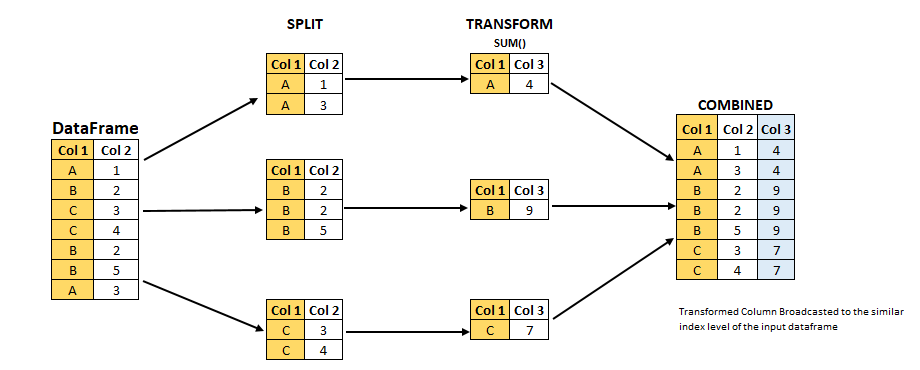